<h1>Machine Learning for Skin Disease Detection<h1>

This is the code for making machine learning model for skin disease detection

In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [2]:
#Link dari file skin disease adalah https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-disease.zip?raw=true

!wget --no-check-certificate \
    "https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-disease.zip?raw=true" \
    -O "/tmp/skin-disease.zip"

--2022-05-25 10:23:07--  https://github.com/TegarNH/Capstone-Project-C22-PS135/blob/main/ML/Data/skin-disease.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/TegarNH/Capstone-Project-C22-PS135/raw/main/ML/Data/skin-disease.zip [following]
--2022-05-25 10:23:07--  https://github.com/TegarNH/Capstone-Project-C22-PS135/raw/main/ML/Data/skin-disease.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/TegarNH/Capstone-Project-C22-PS135/main/ML/Data/skin-disease.zip [following]
--2022-05-25 10:23:07--  https://raw.githubusercontent.com/TegarNH/Capstone-Project-C22-PS135/main/ML/Data/skin-disease.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.gi

In [3]:
#Extract Zip
local_zip = '/tmp/skin-disease.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
source_path = '/tmp/skin-disease'

source_path_acne = os.path.join(source_path, 'Acne')
source_path_black_spots = os.path.join(source_path, 'Black Spots')
source_path_puff_eyes = os.path.join(source_path, 'Puff Eyes')
source_path_wrinkles = os.path.join(source_path, 'Wrinkles')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_acne))} images of acne.")
print(f"There are {len(os.listdir(source_path_black_spots))} images of black spots.")
print(f"There are {len(os.listdir(source_path_puff_eyes))} images of puff eyes.")
print(f"There are {len(os.listdir(source_path_wrinkles))} images of wrinkle.")

There are 115 images of acne.
There are 100 images of black spots.
There are 99 images of puff eyes.
There are 100 images of wrinkle.


In [5]:
# Define root directory
root_dir = '/tmp/skin-disease-train-test'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE
  training_path = 'training'
  testing_path = 'testing'
  wrinkles_path = 'wrinkles'
  acne_path = 'acne'
  black_spots_path = 'black_spots'
  puff_eyes_path = 'puff_eyes'
  path_arr = [testing_path, training_path]
  path_arr2 = [wrinkles_path, acne_path, black_spots_path, puff_eyes_path]

  try:
    for path1 in path_arr:
      path_first = os.path.join(root_path, path1)
      if os.path.isdir(path_first):
        break
      os.makedirs(path_first)
      for path2 in path_arr2:
        path_second = os.path.join(path_first, path2)
        if os.path.isdir(path_second):
          break
        os.makedirs(path_second)
  except OSError:
    pass

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter


  ### END CODE HERE

  
try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [6]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
  list_file = []
  for filename in os.listdir(SOURCE):
    path = SOURCE + filename
    if os.path.getsize(path) > 0:
      list_file.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))

  number_of_files = len(list_file)
  split = int(number_of_files * SPLIT_SIZE)

  shuffle = random.sample(list_file, number_of_files)
  train_file = shuffle[:split]
  test_file = shuffle[split:]

  for filename in train_file:
    copyfile(SOURCE + filename, TRAINING + filename)
  for filename in test_file:
    copyfile(SOURCE + filename, TESTING + filename)



  ### END CODE HERE


In [9]:
# Test your split_data function

# Define paths
ACNE_SOURCE_DIR = "/tmp/skin-disease/Acne/"
WRINKLES_SOURCE_DIR = "/tmp/skin-disease/Wrinkles/"
BLACK_SPOTS_SOURCE_DIR = "/tmp/skin-disease/Black Spots/"
PUFF_EYES_SOURCE_DIR = "/tmp/skin-disease/Puff Eyes/"

TRAINING_DIR = "/tmp/skin-disease-train-test/training/"
TESTING_DIR = "/tmp/skin-disease-train-test/testing/"

TRAINING_ACNE_DIR = os.path.join(TRAINING_DIR, "acne/")
TESTING_ACNE_DIR = os.path.join(TESTING_DIR, "acne/")

TRAINING_WRINKLES_DIR = os.path.join(TRAINING_DIR, "wrinkles/")
TESTING_WRINKLES_DIR = os.path.join(TESTING_DIR, "wrinkles/")

TRAINING_BLACK_SPOTS_DIR = os.path.join(TRAINING_DIR, "black_spots/")
TESTING_BLACK_SPOTS_DIR = os.path.join(TESTING_DIR, "black_spots/")

TRAINING_PUFF_EYES_DIR = os.path.join(TRAINING_DIR, "puff_eyes/")
TESTING_PUFF_EYES_DIR = os.path.join(TESTING_DIR, "puff_eyes/")

In [10]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_ACNE_DIR)) > 0:
  for file in os.scandir(TRAINING_ACNE_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TRAINING_WRINKLES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_PUFF_EYES_DIR)) > 0:
  for file in os.scandir(TRAINING_PUFF_EYES_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BLACK_SPOTS_DIR)) > 0:
  for file in os.scandir(TRAINING_BLACK_SPOTS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_ACNE_DIR)) > 0:
  for file in os.scandir(TESTING_ACNE_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_WRINKLES_DIR)) > 0:
  for file in os.scandir(TESTING_WRINKLES_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_PUFF_EYES_DIR)) > 0:
  for file in os.scandir(TESTING_PUFF_EYES_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_BLACK_SPOTS_DIR)) > 0:
  for file in os.scandir(TESTING_BLACK_SPOTS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(ACNE_SOURCE_DIR, TRAINING_ACNE_DIR, TESTING_ACNE_DIR, split_size)
split_data(WRINKLES_SOURCE_DIR, TRAINING_WRINKLES_DIR, TESTING_WRINKLES_DIR, split_size)
split_data(PUFF_EYES_SOURCE_DIR, TRAINING_PUFF_EYES_DIR, TESTING_PUFF_EYES_DIR, split_size)
split_data(BLACK_SPOTS_SOURCE_DIR, TRAINING_BLACK_SPOTS_DIR, TESTING_BLACK_SPOTS_DIR, split_size)

print(f"There are {len(os.listdir(TRAINING_ACNE_DIR))} images of acne for training")
print(f"There are {len(os.listdir(TRAINING_WRINKLES_DIR))} images of wrinkles for training")
print(f"There are {len(os.listdir(TRAINING_PUFF_EYES_DIR))} images of puff eyes for training")
print(f"There are {len(os.listdir(TRAINING_BLACK_SPOTS_DIR))} images of black spots for training")

print(f"There are {len(os.listdir(TESTING_ACNE_DIR))} images of acne for testing")
print(f"There are {len(os.listdir(TESTING_WRINKLES_DIR))} images of wrinkles for testing")
print(f"There are {len(os.listdir(TESTING_PUFF_EYES_DIR))} images of puff eyes for testing")
print(f"There are {len(os.listdir(TESTING_BLACK_SPOTS_DIR))} images of black spots for testing")

There are 92 images of acne for training
There are 80 images of wrinkles for training
There are 79 images of puff eyes for training
There are 80 images of black spots for training
There are 23 images of acne for testing
There are 20 images of wrinkles for testing
There are 20 images of puff eyes for testing
There are 20 images of black spots for testing


In [11]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-05-25 10:24:18--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 142.251.18.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  23.2MB/s    in 3.6s    

2022-05-25 10:24:22 (23.2 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [12]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [13]:
def create_pre_trained_model(local_weights_file):
  ### START CODE HERE
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False, 
                                  weights = None) 

  pre_trained_model.load_weights(local_weights_file)

  # Make all the layers in the pre-trained model non-trainable
  from tensorflow.keras import layers
  for layer in pre_trained_model.layers:
    layer.trainable = False

  ### END CODE HERE

  return pre_trained_model

In [14]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [15]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [16]:
# GRADED FUNCTION: output_of_last_layer
def output_of_last_layer(pre_trained_model):
  ### START CODE HERE
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)
  ### END CODE HERE

  return last_output

In [17]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [18]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [21]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=11,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator


In [22]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 331 images belonging to 4 classes.
Found 83 images belonging to 4 classes.


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
def create_final_model(pre_trained_model, last_output):
  # Flatten the output layer to 1 dimension
  x = layers.Flatten()(last_output)

  ### START CODE HERE

  # Add a fully connected layer with 1024 hidden units and ReLU activation
  x = layers.Dense(1024, activation='relu')(x)
  # Add a dropout rate of 0.5
  x = layers.Dropout(0.5)(x)  
  # Add a final sigmoid layer for classification
  x = layers.Dense(4, activation='softmax')(x)        

  from tensorflow.keras.optimizers import RMSprop
  from tensorflow.keras import Model
  # Create the complete model by using the Model class
  model = Model(pre_trained_model.input, x)

  # Compile the model
  model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  ### END CODE HERE
  
  return model

In [39]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.80 and logs.get('accuracy')>0.80):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [40]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,515,556 total parameters in this model.
There are 38,540,292 trainable parameters in this model.


In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 99.9% accuracy
# (It should take a few epochs)
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 200,
                    verbose = 1,
                    callbacks=[callbacks])

Epoch 1/200
17/17 [==============================] - 29s 1s/step - loss: 1.7736 - accuracy: 0.3595 - val_loss: 1.2698 - val_accuracy: 0.5060
Epoch 2/200
17/17 [==============================] - 25s 1s/step - loss: 1.3252 - accuracy: 0.4502 - val_loss: 1.1546 - val_accuracy: 0.5060
Epoch 3/200
17/17 [==============================] - 23s 1s/step - loss: 1.1639 - accuracy: 0.5680 - val_loss: 1.0048 - val_accuracy: 0.5663
Epoch 4/200
17/17 [==============================] - 23s 1s/step - loss: 1.1304 - accuracy: 0.5378 - val_loss: 0.9981 - val_accuracy: 0.5542
Epoch 5/200
17/17 [==============================] - 23s 1s/step - loss: 1.0479 - accuracy: 0.5619 - val_loss: 1.0246 - val_accuracy: 0.5663
Epoch 6/200
17/17 [==============================] - 22s 1s/step - loss: 0.9566 - accuracy: 0.6042 - val_loss: 1.0082 - val_accuracy: 0.6024
Epoch 7/200
17/17 [==============================] - 22s 1s/step - loss: 1.0921 - accuracy: 0.5740 - val_loss: 0.8951 - val_accuracy: 0.6627
Epoch 8/200
1

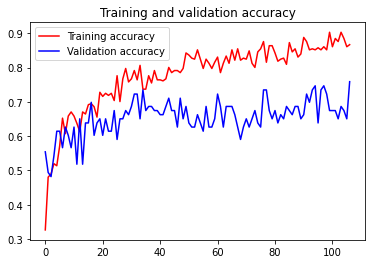

<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [35]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print("acne ")  
  print(classes[0][0])
  print("blackspot ")
  print(classes[0][1])
  print("puff eyes ")
  print(classes[0][2])
  print("wrinkles ")
  print(classes[0][3])
  # if classes[0]>0.5:
  #   print(fn + " is a human")
  # else:
  #   print(fn + " is a horse")

Saving mata panda.JPG to mata panda.JPG
[6.7838369e-04 2.3142835e-01 7.1701878e-01 5.0874498e-02]
acne 
0.0006783837
blackspot 
0.23142835
puff eyes 
0.7170188
wrinkles 
0.050874498


In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
path = './gdrive/MyDrive/Model-ML'
model.save(path+'/saved_model/my_model_disease_75')

INFO:tensorflow:Assets written to: ./gdrive/MyDrive/Model-ML/saved_model/my_model_disease_75/assets


In [38]:
from keras.models import load_model

MODEL_PATH = './gdrive/MyDrive/Model-ML/skin-disease-model-75.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)

In [ ]:
from keras.models import load_model

MODEL_PATH = '/content/drive/My Drive/Model-ML/skin-disease-model-71.h5'

# Now save model in drive
model.save(MODEL_PATH)

# Load Model
model = load_model(MODEL_PATH)

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
path = './drive/My Drive/Model-ML'
model.save(path+'/saved_model/skin-disease_model_71')

INFO:tensorflow:Assets written to: ./drive/My Drive/Model-ML/saved_model/skin-disease_model_71/assets


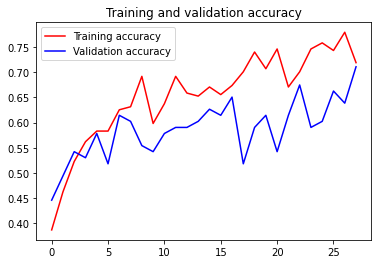

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()